## Challenge: Identifying the type of toxicity in the comments for Jigsaw, Google

#### Building a multi-headed model that’s capable of detecting different types of of toxicity like threats, obscenity, insults, and identity-based hate better than Perspective’s current models.

#### The dataset is of comments from Wikipedia’s talk page edits. 

#### Improvements to the current model will hopefully help online discussion become more productive and respectful.

### This notebook is for supporting Jigsaw:

https://jigsaw.google.com/

Jigsaw is a unit within Google that explores threats to open societies, and builds technology that inspires scalable solutions.

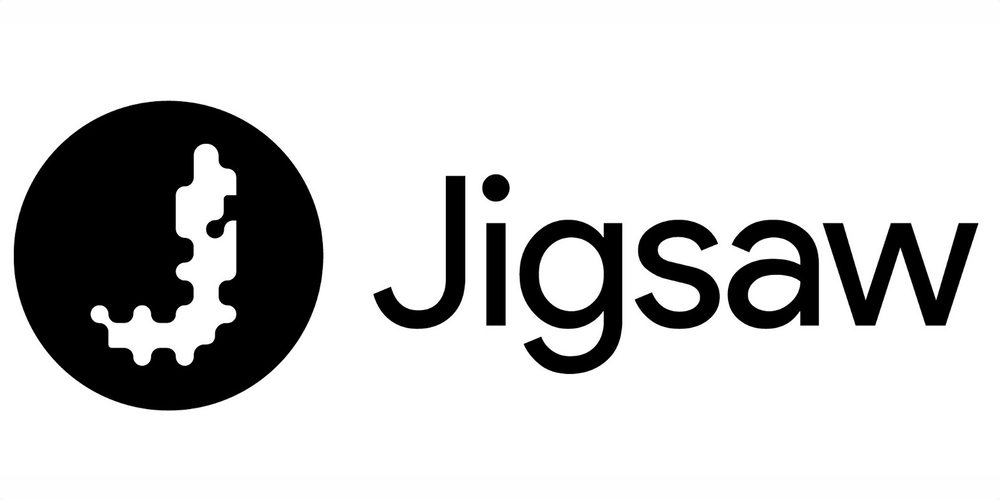

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip


In [9]:
import zipfile

sample_submission_zip = "../input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip"
test_zip = "../input/jigsaw-toxic-comment-classification-challenge/test.csv.zip"
train_zip = "../input/jigsaw-toxic-comment-classification-challenge/train.csv.zip"
test_labels_zip = "../input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip"

for file in [sample_submission_zip, test_zip, train_zip, test_labels_zip]:
    zip_ref = zipfile.ZipFile(file, 'r')
    zip_ref.extractall('./input/csv_files/')
    zip_ref.close()

In [12]:
print(os.listdir('./input/csv_files/'))

train = pd.read_csv("./input/csv_files/train.csv")
test = pd.read_csv("./input/csv_files/test.csv")
test_labels = pd.read_csv("./input/csv_files/test_labels.csv")
sample_submission = pd.read_csv("./input/csv_files/sample_submission.csv")

['test_labels.csv', 'test.csv', 'sample_submission.csv', 'train.csv']


In [15]:
train.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [20]:
test.head(5)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [17]:
test_labels.head(5)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [19]:
sample_submission.head(5)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


## Using Keras LSTM

In [4]:
import sys, os, re, csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Keras imports**

In [6]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Dense, Dropout, Input, LSTM, Embedding, Activation
from keras.layers import GlobalMaxPool1D, Bidirectional
from keras.models import Model

from keras import initializers, optimizers, regularizers, constraints, layers